In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import random
from src.genetic import AGene, EvaluableGene, AGeneticAlgorithm
from src.model import *
from mesa.time import RandomActivation
from tqdm import tqdm
import pandas as pd
import seaborn

In [3]:
ga = AGeneticAlgorithm(p_cross=0.6, p_mut=0.033)

abm_schedular = RandomActivation

model = CurrencySubstitutionModel(
            genetic_algo_class  =   ga, 
            n_agents            =   300,
            G_1                 =   0,
            G_2                 =   9,
            endowment_1         =   10,
            endowment_2         =   1,
            scheduler_constructor =   abm_schedular)

In [4]:
for _ in tqdm(range(1000)):
    model.step() 

100%|██████████| 1000/1000 [00:15<00:00, 64.64it/s]


<AxesSubplot: xlabel='T'>

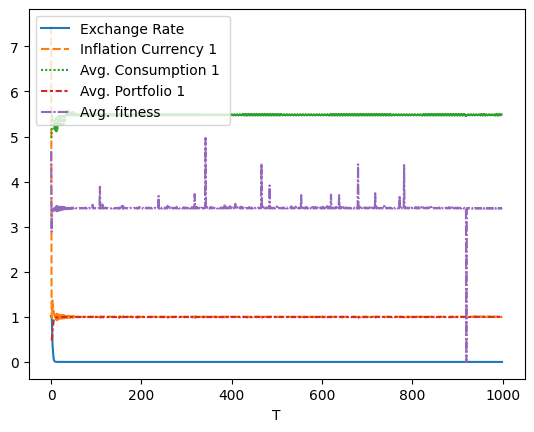

In [48]:
model_df = pd.DataFrame.from_dict(model.datacollector).set_index('T').fillna(0)
seaborn.lineplot(model_df)

In [37]:
model_2 = CurrencySubstitutionModel(
            genetic_algo_class  =   ga, 
            n_agents            =   300,
            G_1                 =   0,
            G_2                 =   1.5,
            endowment_1         =   10,
            endowment_2         =   1,
            scheduler_constructor =   abm_schedular)

In [38]:

for _ in tqdm(range(1000)):
    model_2.step() 


100%|██████████| 1000/1000 [00:15<00:00, 62.99it/s]


<AxesSubplot: xlabel='T'>

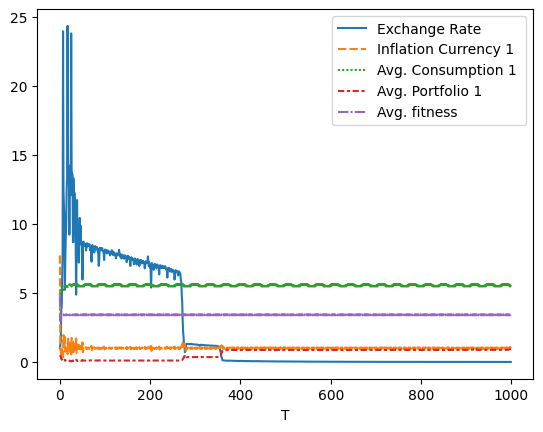

In [47]:

model_df_2 = pd.DataFrame.from_dict(model_2.datacollector).set_index('T').fillna(0)
seaborn.lineplot(model_df_2)

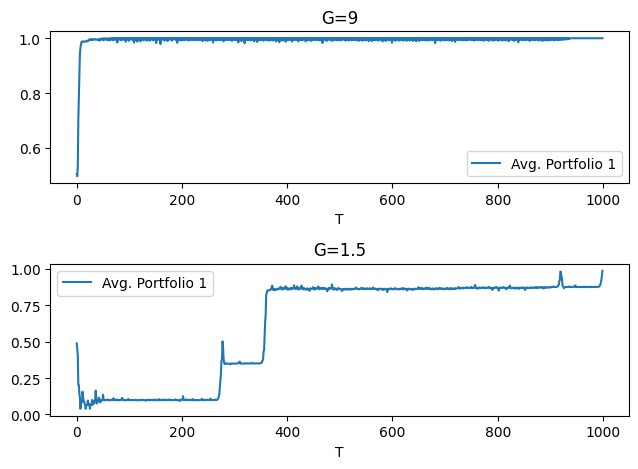

In [44]:
from matplotlib import pyplot as plt


avg_fraction_1 = model_df[['Avg. Portfolio 1']]
avg_fraction_2 = model_df_2[['Avg. Portfolio 1']]

fig, axs = plt.subplots(2,1)

axs[0].set_title('G=9')
axs[1].set_title('G=1.5')
seaborn.lineplot(avg_fraction_1, ax=axs[0])
seaborn.lineplot(avg_fraction_2, ax=axs[1])
fig.tight_layout()

<AxesSubplot: xlabel='T', ylabel='Avg. Consumption 1 '>

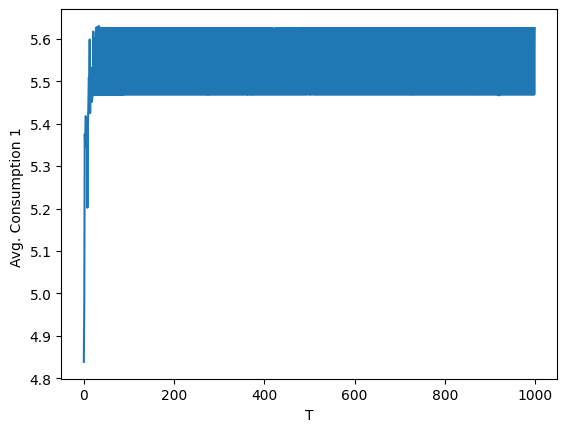

In [45]:
seaborn.lineplot(model_df_2['Avg. Consumption 1 '])

<AxesSubplot: xlabel='T', ylabel='Avg. Consumption 1 '>

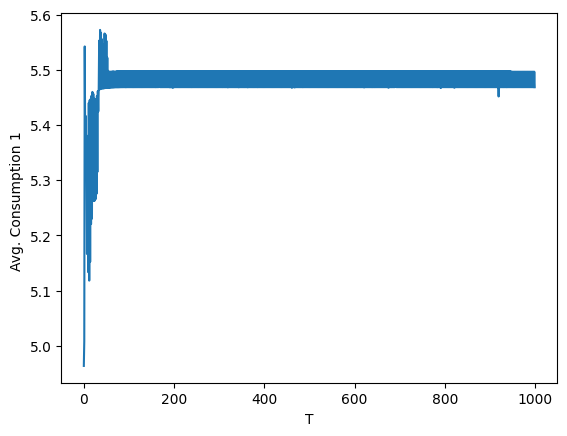

In [46]:

seaborn.lineplot(model_df['Avg. Consumption 1 '])

In [2]:
from src.factory import gene_factory
from src.genetic import AGene
gene_class, decoder = gene_factory([(2,'c'), (3,'d'), (4, 'w')], AGene)

ag1 = gene_class() 
ag2 = gene_class() 

ag3,_ = ag1 * ag2


In [65]:
print(ag3.string)
ag3p = ag3.mutate()
print(ag3p.string)

decoder(ag3p, 'd')

[ True False False False False  True False  True  True]
[ True False  True False False  True False  True  True]


(1, 3)

Signature: decoder(gene: src.base.GA.BaseGene, segment_name: str) -> Tuple[float, int]
Docstring: A decoder
File:      ~/Desktop/論文/Econ-Code-Reproduction/Arifovic 01/src/factory.py
Type:      function


In [9]:
import inspect
from src.base.GA import BaseGene

inspect.isabstract(AGene)

False